Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

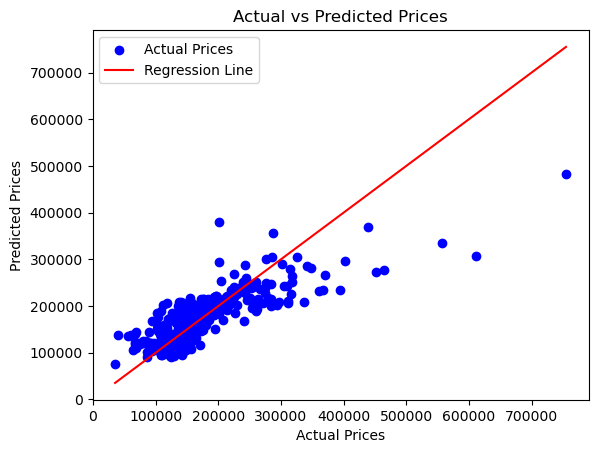

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('/home/somaakash/Documents/train.csv') # This is the path of the dataset which I downloaded from kaggle
test_data = pd.read_csv('/home/somaakash/Documents/test.csv')    # This is the path of dataset which I downloaded from Kaaggle

# Display the columns in the dataset
print(train_data.columns)

# Handling missing values 
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

# Convert categorical variables to numeric 
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

# Make sure that both datasets have the same columns after getting dummies
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

# Select the features and target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

X_train = train_data[features].values
y_train = train_data[target].values
X_test = test_data[features].values

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression().fit(X_train_split, y_train_split)

# Get the coefficients and intercept of the regression line
model_slope = model.coef_
model_intercept = model.intercept_
print('Slope:', model_slope)
print('Intercept:', model_intercept)

# Make predictions on the validation set
y_val_pred = model.predict(X_val_split)

# Evaluate the model
mae = mean_absolute_error(y_val_split, y_val_pred)
mse = mean_squared_error(y_val_split, y_val_pred)
r2 = r2_score(y_val_split, y_val_pred)
print(f"Validation Mean Absolute Error is: {mae}")
print(f"Validation Mean Squared Error is: {mse}")
print(f"Validation R-squared is: {r2}")


# Visualize the results
plt.scatter(y_val_split, y_val_pred, color='blue', label='Actual Prices')
plt.plot([y_val_split.min(), y_val_split.max()], [y_val_split.min(), y_val_split.max()], color='red', label='Regression Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()
